In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Nettoyage des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Vérifie les doublons
df.duplicated().sum()

0

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#valeurs uniques
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.select_dtypes(include=["number"])

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [9]:
# sélection des colonnes catégoriel
categoriel_col = df.select_dtypes(exclude=["number"]).columns
categoriel_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [10]:
# encodage des colonnes catégorielles
#categoriel_col = pd.DataFrame({'gender': ['male', 'female']})
categoriel_df = df[categoriel_col]
#df_encoded = pd.get_dummies(categoriel_df, columns=categoriel_col)
#df_encoded


encoder les colonnes catégoriels 

In [11]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


encodage one hot encoding

In [12]:
# one hot encoding pour la colonne gender et test preparation course
df = pd.get_dummies(df, columns=['gender', 'test preparation course'])
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,group B,bachelor's degree,standard,72,72,74,True,False,False,True
1,group C,some college,standard,69,90,88,True,False,True,False
2,group B,master's degree,standard,90,95,93,True,False,False,True
3,group A,associate's degree,free/reduced,47,57,44,False,True,False,True
4,group C,some college,standard,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,88,99,95,True,False,True,False
996,group C,high school,free/reduced,62,55,55,False,True,False,True
997,group C,high school,free/reduced,59,71,65,True,False,True,False
998,group D,some college,standard,68,78,77,True,False,True,False


Encodage ordinale

In [13]:
#encodage ordinal

encodage = OrdinalEncoder(categories=[["high school", "some high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]])
encodage.fit(df[['parental level of education']])
df['parental level of education'] = encodage.transform(df[['parental level of education']])
df

# 0 = high school
# 1 = some high school
# 2 = some college
# 3 = associate's degree
# 4 = bachelor's degree
# 5 = master's degree

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,group B,4.0,standard,72,72,74,True,False,False,True
1,group C,2.0,standard,69,90,88,True,False,True,False
2,group B,5.0,standard,90,95,93,True,False,False,True
3,group A,3.0,free/reduced,47,57,44,False,True,False,True
4,group C,2.0,standard,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,group E,5.0,standard,88,99,95,True,False,True,False
996,group C,0.0,free/reduced,62,55,55,False,True,False,True
997,group C,0.0,free/reduced,59,71,65,True,False,True,False
998,group D,2.0,standard,68,78,77,True,False,True,False


Encodage de fréquence

In [14]:
# Encodage de fréquence
encodage_freq = df['race/ethnicity'].value_counts(normalize=True)

df['race/ethnicity'] = df['race/ethnicity'].map(encodage_freq)
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.190,4.0,standard,72,72,74,True,False,False,True
1,0.319,2.0,standard,69,90,88,True,False,True,False
2,0.190,5.0,standard,90,95,93,True,False,False,True
3,0.089,3.0,free/reduced,47,57,44,False,True,False,True
4,0.319,2.0,standard,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,0.140,5.0,standard,88,99,95,True,False,True,False
996,0.319,0.0,free/reduced,62,55,55,False,True,False,True
997,0.319,0.0,free/reduced,59,71,65,True,False,True,False
998,0.262,2.0,standard,68,78,77,True,False,True,False


Encodage de cible

In [15]:
# encodage de cible
df_encodage_cible = pd.DataFrame({'lunch': ['standard', 'free/reduced'], 'target': [0,1]})
mean_cb = df_encodage_cible.groupby('lunch')['target'].mean()
df['lunch'] = df['lunch'].map(mean_cb)
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.190,4.0,0.0,72,72,74,True,False,False,True
1,0.319,2.0,0.0,69,90,88,True,False,True,False
2,0.190,5.0,0.0,90,95,93,True,False,False,True
3,0.089,3.0,1.0,47,57,44,False,True,False,True
4,0.319,2.0,0.0,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,0.140,5.0,0.0,88,99,95,True,False,True,False
996,0.319,0.0,1.0,62,55,55,False,True,False,True
997,0.319,0.0,1.0,59,71,65,True,False,True,False
998,0.262,2.0,0.0,68,78,77,True,False,True,False


In [16]:
df

,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,gender_female,gender_male,test preparation course_completed,test preparation course_none
0,0.190,4.0,0.0,72,72,74,True,False,False,True
1,0.319,2.0,0.0,69,90,88,True,False,True,False
2,0.190,5.0,0.0,90,95,93,True,False,False,True
3,0.089,3.0,1.0,47,57,44,False,True,False,True
4,0.319,2.0,0.0,76,78,75,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
995,0.140,5.0,0.0,88,99,95,True,False,True,False
996,0.319,0.0,1.0,62,55,55,False,True,False,True
997,0.319,0.0,1.0,59,71,65,True,False,True,False
998,0.262,2.0,0.0,68,78,77,True,False,True,False


Normalisation des données

In [17]:
scaler = MinMaxScaler()

scaler.set_output(transform="pandas")

scaler.fit(df)

donnees_normaliser = scaler.transform(df)

2. Analyse exploratoire et visualisation

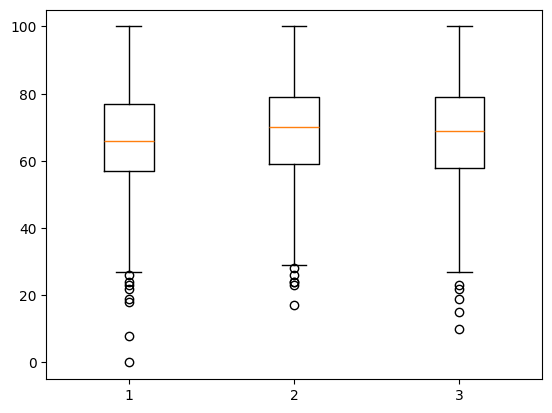

In [18]:
colonnes_a_tracer = ['math score', 'reading score', 'writing score']

plt.boxplot(df[colonnes_a_tracer])
plt.show()
# Il y a dans chacun à peu près le même nombre de valeurs abérantes

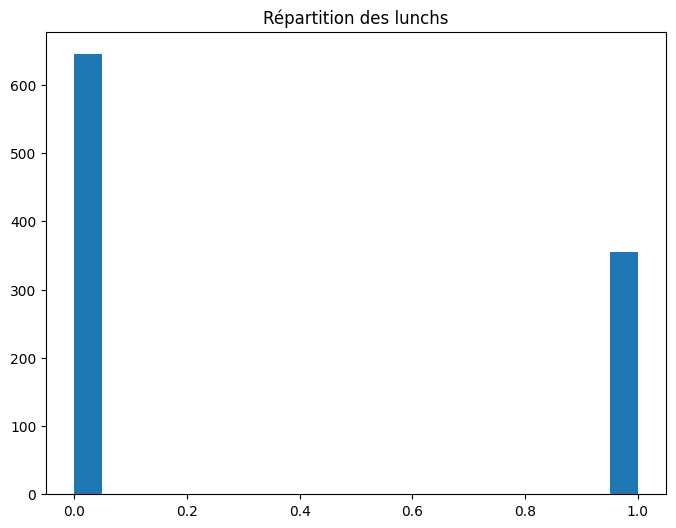

In [19]:
#histogramme pour représenter la répartion de chaque type de lunch

plt.figure(figsize=(8, 6))
plt.hist(df['lunch'], bins=20)
plt.title('Répartition des lunchs')
plt.show()

Corrélations

<Axes: >

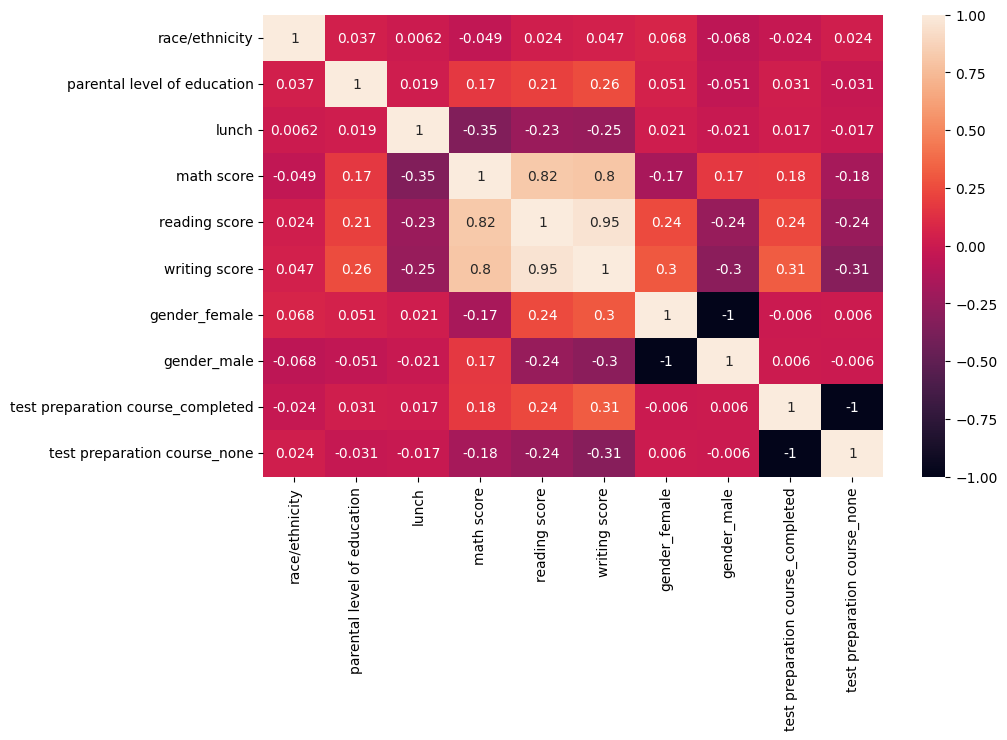

In [20]:
#matrice de corrélation de spearman
corr_matrix_pearson = df.corr()
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix_pearson, annot=True)

In [21]:
df['test preparation course_completed'].value_counts()

test preparation course_completed
False    642
True     358
Name: count, dtype: int64

In [22]:
df['race/ethnicity'].value_counts()

race/ethnicity
0.319    319
0.262    262
0.190    190
0.140    140
0.089     89
Name: count, dtype: int64

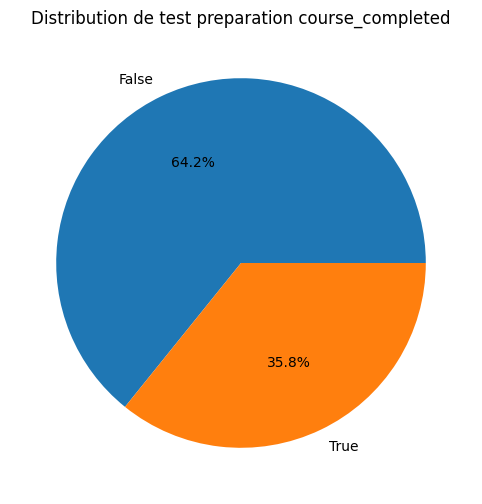

In [23]:
# diagramme circulaire de la colonne test preparation course completed

compte1 = df['test preparation course_completed'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(compte1.values, labels=compte1.index, autopct='%1.1f%%')
plt.title('Distribution de test preparation course_completed')

plt.show()

In [24]:
# Le nombre d'étudiant est plus large dans le groupe '0.319'
df_mode_race_eth = df['race/ethnicity'].mode()

df_mode_race_eth

0    0.319
Name: race/ethnicity, dtype: float64

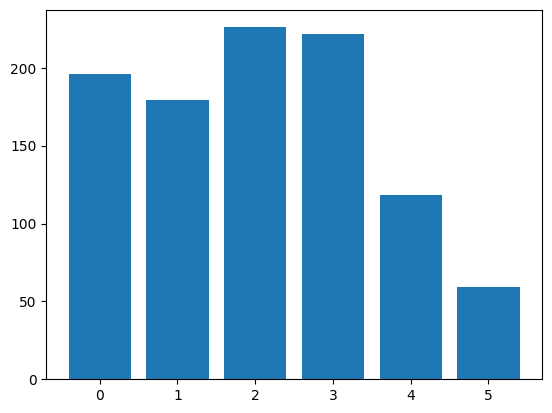

In [25]:
#histogramme pour la colonne 'parental level of education'
compte = df['parental level of education'].value_counts()
plt.bar(compte.index, compte.values)
plt.show()

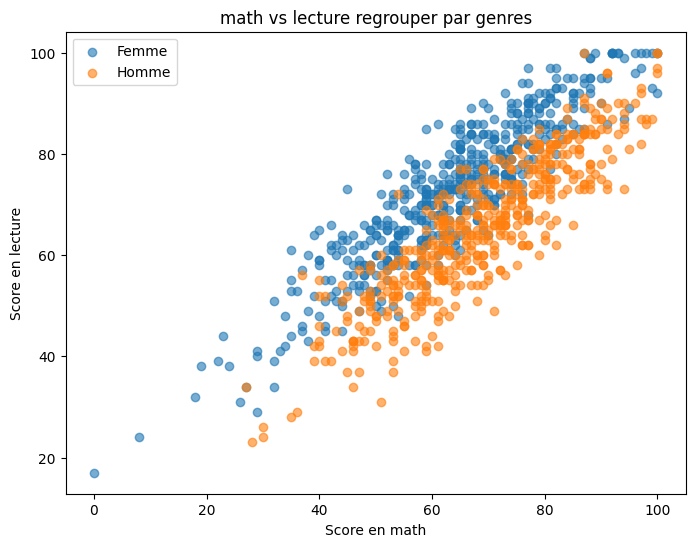

In [26]:
#Nuage de points : coloré par genre
plt.figure(figsize=(8,6))
plt.scatter(df[df['gender_female'] == 1]['math score'], df[df['gender_female'] == 1]['reading score'], label='Femme', alpha=0.6)
plt.scatter(df[df['gender_male'] == 1]['math score'], df[df['gender_male'] == 1]['reading score'], label='Homme', alpha=0.6)
plt.title("math vs lecture regrouper par genres")
plt.xlabel("Score en math")
plt.ylabel("Score en lecture")
plt.legend()
plt.show()

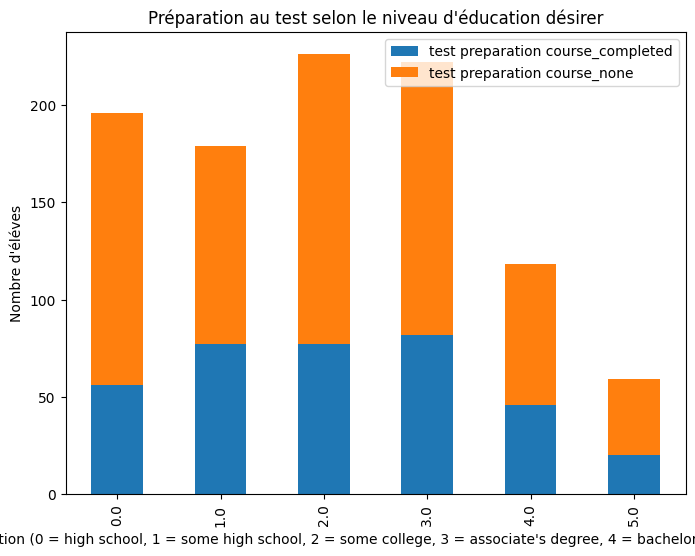

In [27]:
# Diagramme à bande
#Création d'un tableau croisé
prep_level_education = df.groupby('parental level of education')[['test preparation course_completed', 'test preparation course_none']].sum()


prep_level_education.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Préparation au test selon le niveau d'éducation désirer")
plt.xlabel("Type de niveau d'éducation (0 = high school, 1 = some high school, 2 = some college, 3 = associate's degree, 4 = bachelor's degree, 5 = master's degree)")
plt.ylabel("Nombre d'éléves")
plt.show()

In [28]:
# Séparation des données
y = donnees_normaliser["test preparation course_completed"].astype(int)
X = donnees_normaliser.drop(columns=["test preparation course_completed", "test preparation course_none"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

3. Modélisation supervisée

In [29]:
#Entrainement de deux modèles (SVM, Arbre) 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

modelSVM = SVC(kernel='rbf', probability=True, random_state=42)
ModelArbre = DecisionTreeClassifier(random_state=42)

modelSVM.fit(X_train, y_train)
ModelArbre.fit(X_train, y_train)

pred_SVM = modelSVM.predict(X_test)
pred_Arbre = ModelArbre.predict(X_test)

print("Score (SVM): ", accuracy_score(y_test, pred_SVM))
print("Score (Arbre): ", accuracy_score(y_test, pred_Arbre))
print("Score de précision (SVM): ", precision_score(y_test, pred_SVM))
print("Score de précision (Arbre): ", precision_score(y_test, pred_Arbre))
print("rappel (SVM): ", recall_score(y_test, pred_SVM))
print("rappel (Arbre): ", recall_score(y_test, pred_Arbre))

Score (SVM):  0.672
Score (Arbre):  0.66
Score de précision (SVM):  0.64
Score de précision (Arbre):  0.5208333333333334
rappel (SVM):  0.1797752808988764
rappel (Arbre):  0.5617977528089888


In [30]:
# Validaiton croisée
kf = KFold(n_splits=5, shuffle=True)

scores_SVM = cross_val_score(modelSVM, X, y, cv=kf, scoring='accuracy')
scores_Arbre = cross_val_score(ModelArbre, X, y, cv=kf, scoring='accuracy')

print("validaiton croisé (SVM): ", scores_SVM)
print("validaiton croisé (Arbre): ", scores_Arbre)

validaiton croisé (SVM):  [0.63  0.635 0.68  0.72  0.62 ]
validaiton croisé (Arbre):  [0.67  0.64  0.575 0.65  0.615]


4. Modélisation non supervisée (clustering)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Clustering K-means
k=4

kmeans = KMeans(n_clusters=k, random_state=42)
pred_kmeans = kmeans.fit_predict(X)

# Évaluation avec CH, Silhouette, DB
print("CH: ", calinski_harabasz_score(X, pred_kmeans))
print("Silhouette: ", silhouette_score(X, pred_kmeans))
print("Davies-Bouldin: ", davies_bouldin_score(X, pred_kmeans))

CH:  910.1822226332339
Silhouette:  0.45322156862224094
Davies-Bouldin:  0.9756263355694761


c:\Users\danie\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\danie\miniconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\danie\miniconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\danie\miniconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\danie\miniconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProc

In [34]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

pred_rf = RFC.predict(X_test)

print("accuracy_score: ", accuracy_score(y_test, pred_rf))
print("précision de score: ", precision_score(y_test, pred_rf))
print("rappel: ", recall_score(y_test, pred_rf))

accuracy_score:  0.728
précision de score:  0.6666666666666666
rappel:  0.47191011235955055
